### Dataset Analysis and Its Relation to the Two-Pot Retirement System of South Africa

#### **Introduction**
The **Two-Pot Retirement System** in South Africa was established to enhance retirement savings outcomes. This innovative system divides contributions into two distinct pots:

1. **Savings Pot (One-Third)**: Allows individuals to access a portion of their savings in emergencies, providing necessary liquidity.
2. **Locked Pot (Two-Thirds)**: Focused on long-term growth, it restricts access until retirement, ensuring financial stability for retirees.

This analysis examines a dataset related to pension funding information, which is crucial for understanding how municipal pension plans are funded and their implications on retirement savings.

The dataset was downloaded from [Data Gov](https://catalog.data.gov/dataset/municipal-fiscal-indicators-pension-funding-information-for-defined-benefit-pension-plans--5a69c).

---

#### **Dataset Overview**
The dataset consists of fiscal indicators and pension funding information for defined benefit pension plans. Key features of the dataset include:

- **Number of Eligible Employees**: Total number of employees eligible for pension plans.
- **Active Members**: The number of employees currently contributing to the pension fund.
- **Discount Rate**: The assumed rate used to calculate present values of future pension liabilities.
- **Long-Term Investment Rate of Return**: The expected return on pension fund investments over the long term.
- **Net Pension Liability**: The difference between pension liabilities and assets.
- **Funded Ratio**: A measure of the financial health of the pension fund, indicating the ratio of assets to liabilities.

---

#### **Data Exploration and Preparation**
The dataset was initially explored to understand its structure and contents. The target variable for this analysis was created based on the funded ratio:

- **Withdrawal**: This binary variable indicates whether withdrawals are likely, based on whether the funded ratio is below 60%.

Missing values were handled using mean imputation, ensuring that the dataset remains robust for analysis.

#### **Modeling Approach**
A **Random Forest Classifier** was employed to predict the likelihood of withdrawals based on selected features. The dataset was split into training and test sets to evaluate the model's performance. 

Key steps included:
- **Feature Selection**: Relevant features were identified, including discount rates, investment returns, and funded ratios.
- **Model Training**: A Random Forest model was trained using the selected features.
- **Model Evaluation**: The model's performance was assessed through accuracy score, confusion matrix, and classification report.

---

#### **Key Insights**
1. **Predictive Model**: The Random Forest model provides insights into which features significantly influence the likelihood of withdrawals. Understanding these factors is essential for financial planning, especially in the context of the Two-Pot Retirement System.

2. **Importance of Funded Ratios**: The analysis highlights the significance of the funded ratio, directly linking it to the sustainability of the Locked Pot. A well-funded pension plan is crucial for ensuring that retirees have adequate savings when they reach retirement age.

3. **Investment Returns**: The long-term investment rate of return is another critical feature, demonstrating how the Locked Pot can grow over time, influenced by the performance of investments. This aspect underscores the importance of strategic investment choices in enhancing retirement savings.

4. **Withdrawal Patterns**: Identifying the likelihood of withdrawals allows policymakers and financial planners to design better strategies that ensure the financial security of retirees. It also aligns with the objectives of the Two-Pot System, where the Locked Pot should ideally be insulated from premature withdrawals.

---

#### **Conclusion**
This dataset analysis provides valuable insights into the funding and sustainability of pension plans within the context of South Africa's Two-Pot Retirement System. By understanding the dynamics of pension funding and its implications on long-term savings, stakeholders can make informed decisions to enhance retirement outcomes for employees. The focus on both the Locked Pot and Savings Pot illustrates the balance between providing immediate access to funds while ensuring long-term financial security.


In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

In [81]:
# Load the dataset
df = pd.read_csv('Municipal_Fiscal_Indicators__Pension_Funding_Information_For_Defined_Benefit_Pension_Plans__2021.csv')

In [82]:
df.columns

Index(['Entity Name', 'C-2 Plan Name', 'D-4 All Eligible Employees',
       'D-6 General Town', 'D-8 Police', 'D-10 Fire',
       'D-12 Non Certified Board of Education', 'D-14 Other',
       'D-16 Brief Description (if other)', 'F-2 Closed Plan',
       'F-4 Volunteer Plan', 'F-6 Total Number of Members',
       'F-8 Number of Active Members', 'H-2 Discount Rate',
       'H-4 Long-Term Investment Rate of Return', 'H-6 Money Weight of Return',
       'J-2 Date of Pension Valuation', 'J-16 Covered Payroll',
       'J-4 Valuation Method', 'J-6 Total Pension Liability of the Plan',
       'J-8 Plan Fiduciary Net Position', 'J-10 Net Pension Liability',
       'J-12 Funded Ratio', 'J-14 Pay As You Go Plan',
       'J-18 Actuarial Determined Employer Contribution (ADEC)',
       'J-20 Employer Contribution Made',
       'J-22 Contribution Shortfall (Excess)'],
      dtype='object')

In [83]:
# Data Exploration
print(df.head())

  Entity Name                                      C-2 Plan Name  \
0     ANSONIA                    City Employees' Retirement Plan   
1     ANSONIA                             Police Retirement Plan   
2        AVON  Retirement Plan For Board of Education of Town...   
3        AVON                 Retirement Plan for Town Employees   
4      BERLIN                Town of Berlin Defined Benefit Plan   

   D-4 All Eligible Employees  D-6 General Town  D-8 Police  D-10 Fire  \
0                        True             False       False      False   
1                       False             False        True      False   
2                       False             False       False      False   
3                        True             False       False      False   
4                        True             False       False      False   

   D-12 Non Certified Board of Education  D-14 Other  \
0                                  False       False   
1                                 

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Entity Name                                             212 non-null    object 
 1   C-2 Plan Name                                           212 non-null    object 
 2   D-4 All Eligible Employees                              212 non-null    bool   
 3   D-6 General Town                                        212 non-null    bool   
 4   D-8 Police                                              212 non-null    bool   
 5   D-10 Fire                                               212 non-null    bool   
 6   D-12 Non Certified Board of Education                   212 non-null    bool   
 7   D-14 Other                                              212 non-null    bool   
 8   D-16 Brief Description (if other)       

In [85]:
# Creating a target variable for withdrawals based on funded ratio
df['Withdrawal'] = np.where(df['J-12 Funded Ratio'] < 60, 1, 0)

In [86]:
# Relevant features selection
features = ['D-4 All Eligible Employees', 'F-8 Number of Active Members', 
            'H-2 Discount Rate', 'H-4 Long-Term Investment Rate of Return', 
            'H-6 Money Weight of Return', 'J-10 Net Pension Liability', 
            'J-12 Funded Ratio']

In [87]:
# Handling missing values with mean imputation
imputer = SimpleImputer(strategy='mean')
df[features] = imputer.fit_transform(df[features])

In [88]:
# Splitting the dataset
X = df[features]
y = df['Withdrawal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Random Forest model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [90]:
# Making predictions
y_pred = model.predict(X_test)

In [91]:
# Model evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[36  0]
 [ 0  7]]


In [92]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00         7

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [93]:
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 1.0


In [94]:
# Feature Importance Visualization
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

Text(0.5, 1.0, 'Feature Importance in Predicting Withdrawals')

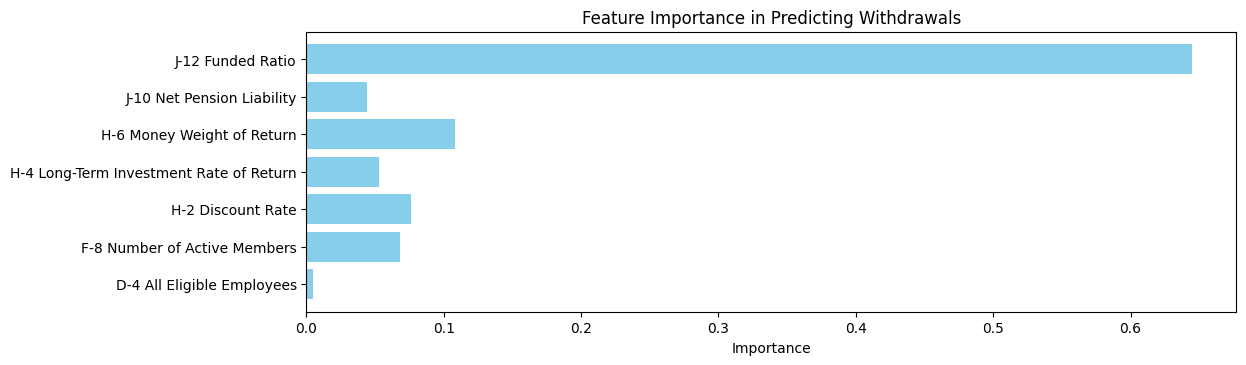

In [95]:
# Plotting feature importances
plt.figure(figsize=(12, 8))

# Bar plot for feature importance
plt.subplot(2, 1, 1)
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Withdrawals')

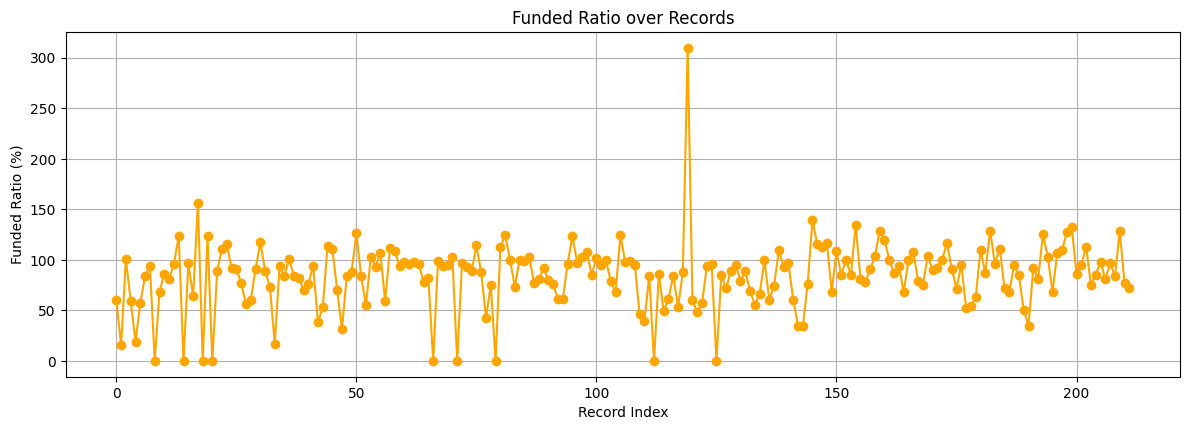

In [96]:
# Line plot for the Funded Ratio
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 2)
plt.plot(df['J-12 Funded Ratio'], color='orange', marker='o', linestyle='-', linewidth=1.5)
plt.title('Funded Ratio over Records')
plt.ylabel('Funded Ratio (%)')
plt.xlabel('Record Index')
plt.grid()

plt.tight_layout()
plt.show()